In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [41]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
ploop = data[0:1000]
print(ploop)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        1       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        1       0       0       0       0       0       0       0       0   
3        4       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
995      2       0       0       0       0       0       0       0       0   
996      5       0       0       0       0       0       0       0       0   
997      9       0       0       0       0       0       0       0       0   
998      6       0       0       0       0       0       0       0       0   
999      4       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [43]:
data = np.array(data)
m, n = data.shape #row,column
np.random.shuffle(data)

data_dev = data[0:1000].T #gets 1000 columns from the 2nd column and then transposes to rows
Y_dev = data_dev[0] #its the first row,i.e all the digits
X_dev = data_dev[1:n] #its all the columns in data,i.e all the training data except the digits
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train =data_train[1:n] #its all the columns in data,i.e all the training data except the digits
X_train = X_train/255 #why are we dividing each no in the matrix by 255?
_,m_train = X_train.shape
print(X_train.shape)

(784, 41000)


In [47]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5 
    #returns a random matrix with that shape
    #since the values of the array are bw 0 and 1, we are subtracting 0.5 to get it bw -0.5 and 0.5
    b1 = np.random.rand(10,1) - 0.5 #why do we do this though?
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z)) #takes the exponent of each element of the matrix and divides it by the sum of all the exponent values

def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1) #this is the activation of the neuron1
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2) #activation of neuron2
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max() + 1)) #y is the array of pixels for each training digit
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y #assigns the result digits to specific matrices, and then later on compares these to the matrix it has got.

def deriv_ReLU(Z):
    return Z > 0  #false is 0, true is 1.

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2  #returns updated weights and biases
# alpha is just a constant which is called learning rate
    

    

In [1]:
def get_predictions(A2):
    return np.argmax(A2, 0) #returns the column indices of the max element of each column in the form of an array

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size  #gets the number of true values and divides it by size, so its a value below 1

def gradient_descent(X, Y, alpha, iterations):  #the main function which does the iteration
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) #does the forward prop and then does backprop to get cost function and then updates the parameters
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:    #every 10th iteration it gives the accuracy
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [57]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 300)

Iteration:  0
[0 0 6 ... 6 6 6] [2 5 4 ... 7 8 7]
0.1283170731707317
Iteration:  10
[0 0 7 ... 2 2 2] [2 5 4 ... 7 8 7]
0.24124390243902438
Iteration:  20
[0 2 4 ... 7 8 2] [2 5 4 ... 7 8 7]
0.3291951219512195
Iteration:  30
[2 2 4 ... 7 8 4] [2 5 4 ... 7 8 7]
0.39207317073170733
Iteration:  40
[2 2 4 ... 4 8 4] [2 5 4 ... 7 8 7]
0.4348292682926829
Iteration:  50
[2 2 4 ... 7 8 4] [2 5 4 ... 7 8 7]
0.47817073170731705
Iteration:  60
[2 2 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.5151951219512195
Iteration:  70
[2 2 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.5481951219512196
Iteration:  80
[2 2 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.5742439024390243
Iteration:  90
[2 2 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.5984878048780488
Iteration:  100
[2 2 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.6194634146341463
Iteration:  110
[2 0 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.6370731707317073
Iteration:  120
[2 0 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.6544878048780488
Iteration:  130
[2 0 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.6702926829268293
Iteration:  14

In [58]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def train_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  9


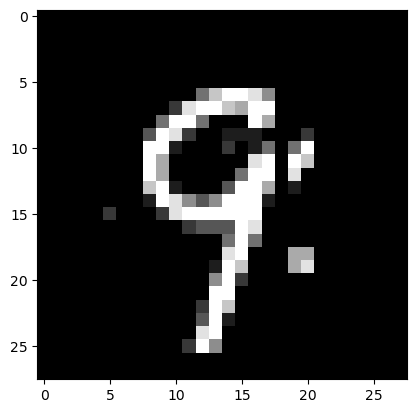

In [59]:
test_prediction(789, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


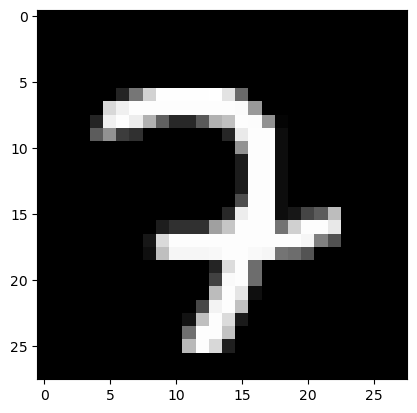

In [60]:
test_prediction(177, W1, b1, W2, b2)

In [61]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(dev_predictions, Y_dev))

[7 9 4 2 2 1 6 3 2 5 2 8 1 7 5 5 9 4 7 0 9 2 6 4 7 9 4 7 7 8 0 3 9 9 7 8 2
 8 5 2 7 5 3 3 2 1 7 0 4 2 1 3 4 2 8 3 7 3 7 0 3 8 0 1 9 5 7 4 6 5 5 5 2 9
 0 9 1 9 1 0 8 5 5 1 7 4 1 1 1 4 5 9 1 3 7 9 9 4 9 8 1 0 6 4 6 7 4 0 6 2 0
 0 6 9 3 3 9 1 4 3 9 4 1 8 6 7 3 4 6 9 6 0 3 7 8 9 9 0 8 7 0 2 3 3 7 3 2 1
 7 0 0 3 6 0 0 1 2 2 7 8 7 2 0 4 1 7 1 3 1 8 8 1 4 0 1 3 7 7 3 0 2 5 4 2 8
 4 1 3 7 8 9 1 5 6 2 0 7 7 8 0 8 9 2 6 9 3 3 6 0 7 5 4 9 6 7 1 8 1 1 5 1 4
 6 9 0 4 8 0 8 2 8 5 2 6 2 9 7 7 1 1 8 7 0 8 7 8 8 4 3 3 3 1 9 2 5 3 7 3 7
 5 3 8 8 5 1 5 7 6 3 5 9 7 4 0 6 0 2 9 4 9 2 7 0 1 9 9 1 9 7 1 3 9 5 1 0 1
 1 4 6 2 4 7 0 4 0 4 9 3 6 5 8 9 0 3 8 3 2 6 8 2 2 0 2 4 0 4 7 7 9 6 3 5 6
 8 3 3 2 5 1 8 3 2 0 9 1 5 6 5 2 7 3 1 2 1 0 1 9 5 2 6 1 6 9 6 9 0 6 8 1 8
 6 4 0 1 3 2 4 0 3 6 8 3 6 6 6 4 6 0 3 9 1 2 8 3 7 3 1 7 4 1 1 6 5 6 3 6 9
 0 7 0 0 0 3 1 3 8 6 2 8 9 1 9 3 5 1 6 2 7 9 5 8 6 3 1 3 6 6 1 5 1 4 9 8 3
 7 1 3 7 8 3 2 0 6 6 4 9 8 2 6 4 2 3 3 4 4 1 3 3 8 9 2 4 9 3 0 7 5 1 5 1 9
 4 6 2 3 4 1 5 7 9 8 8 8 

In [62]:
train_predictions = make_predictions(X_train, W1, b1, W2, b2)
print(get_accuracy(train_predictions, Y_train))

[2 5 4 ... 7 8 7] [2 5 4 ... 7 8 7]
0.7960975609756098
